In [5]:
import scipy.stats as scs
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pymongo import MongoClient
from bs4 import BeautifulSoup

from time import sleep
from selenium import webdriver

import functions_

In [ ]:
'''Using selenium to get trails' webpage html'''
trails_urls = []
mongo_db = '' #mountain/park name

for url in trails_urls:
    # Opening ChromeDriver & MongoClient
    driver = webdriver.Chrome()
    client = MongoClient()

    driver.get(url)
    sleep(3)

    driver.execute_script("window.scrollTo(0, 10000)")

    # find 'show more reviews button'
    search = driver.find_element_by_css_selector("#reviews > div.styles-module__container___px-t2.xlate-none > button")

    # prevents error being thrown once total trail reviews is reached; 
    showing_results = driver.find_element_by_css_selector('#reviews > div.styles-module__container___px-t2.xlate-none > div')
    total_ = int(showing_results.text.split(' ')[-1])

    # clicks through to see additional reviews
    for _ in range(total_//30):
        search.click()
        sleep(1)

    # get page html
    html = driver.page_source
    time.sleep(2)

    # add html to mongo
    db = client[mongo_db]
    trail_name = "".join(((" ".join(((url.split('/'))[-1]).split('-'))).title()).split(" "))
    pages = db[trail_name]
    pages.insert_one({'link': url, 'html': html})

In [6]:
mongo_db = 'bearmountain'
client = MongoClient()
db = client[mongo_db]
db.list_collection_names()

['PopolopenTorneLoop',
 'DoodletownBridlePathLoopTrail',
 'DunderbergBaldMountainAndTheTimpLoop',
 'BearMountainLoopTrail',
 'BaldMountainLoop',
 'WestMountainLoopTrail',
 'PerkinsMemorialTowerViaAppalachianTrail',
 'TimpTorneTrail',
 'TimpTrail',
 'TimpTorneTrailAndDunderbergSpiralRailwayAndLoop']

In [5]:
client = MongoClient()
db = client.bearmountain
db.list_collection_names()

['PopolopenTorneLoop',
 'DoodletownBridlePathLoopTrail',
 'DunderbergBaldMountainAndTheTimpLoop',
 'BearMountainLoopTrail',
 'BaldMountainLoop',
 'WestMountainLoopTrail',
 'PerkinsMemorialTowerViaAppalachianTrail',
 'TimpTorneTrail',
 'TimpTrail',
 'TimpTorneTrailAndDunderbergSpiralRailwayAndLoop']

In [ ]:
'''Use stored html text in mongo to create mongo collection of hiking trail reviewer data'''

df = pd.DataFrame(list(db.BearMountainLoopTrail.find({})))
soup = BeautifulSoup(df.iloc[0,2], 'html.parser')

# getting trail title, description, difficulty, info
soup.find('h1', class_='xlate-none styles-module__name___1nEtW').text.rstrip()
soup.find('p', id="auto-overview").text.rstrip()
soup.find('span', class_="styles-module__diff___22Qtv styles-module__moderate___3w1it styles-module__selected___3fawg").text.rstrip()
soup.find('span', class_="styles-module__detailData___kQ-eK").text.rstrip()

soup_ratings = soup.find_all('span', class_="MuiRating-root default-module__rating___1k45X MuiRating-sizeLarge MuiRating-readOnly")
soup_dates = soup.find_all('span', class_="styles-module__dateTrailDetails___3qgZC xlate-none")
soup_types = soup.find_all('span', class_="styles-module__tag___2s-oD styles-module__activityTag___3-RdN")
soup_reviews = soup.find_all('div', class_="styles-module__container___3etfA")

# getting reviewer data for trail, appending to lists
for i, review in enumerate(soup.find_all('div', itemprop="review")):
    d = {'ratings': [], 'dates': [], 'types': [], 'written_review': []}
    d['ratings'] = soup_ratings[i]['aria-label']
    d['dates'] = soup_dates[i].text.rstrip()
    d['types'] = soup_types[i].text.rstrip()

    written_review = soup_reviews[i].find('p', itemprop="reviewBody")

    if written_review == None:
        d['review_text'] = (None)

    else:
        d['review_text'] = (soup.find_all('div', class_="styles-module__container___3etfA")[i].find('p', itemprop="reviewBody").text.rstrip())
        
    client = MongoClient()
    db = client.bearmountain
    db.BearMountainLoopTrail.insert_one(d)

In [6]:
'''Converting stored mongo collections into pandas dataframes'''

bear_mount = db.BearMountainLoopTrail
bear_mount_df = (pd.DataFrame(list(bear_mount.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

pop = db.PopolopenTorneLoop
pop_df = (pd.DataFrame(list(pop.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

dund = db.DunderbergBaldMountainAndTheTimpLoop
dund_df = (pd.DataFrame(list(dund.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

ttt = db.TimpTorneTrail
ttt_df = (pd.DataFrame(list(ttt.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

perkins = db.PerkinsMemorialTowerViaAppalachianTrail
perkins_df = (pd.DataFrame(list(perkins.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

doodle = db.DoodletownBridlePathLoopTrail
doodle_df = (pd.DataFrame(list(doodle.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

tt = db.TimpTrail
tt_df = (pd.DataFrame(list(tt.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

tttd = db.TimpTorneTrailAndDunderbergSpiralRailwayAndLoop
tttd_df = (pd.DataFrame(list(tttd.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

west_mount = db.WestMountainLoopTrail
west_mount_df = (pd.DataFrame(list(west_mount.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

bald_mount = db.BaldMountainLoop
bald_mount_df = (pd.DataFrame(list(bald_mount.find({}, {'_id':False, 'ratings':True, 'dates':True, 'types':True, 'review_text':True})))).iloc[1:,:]

In [7]:
'''Concatenating sub-dataframes to form one dataframe'''
df = pd.concat([bear_mount_df, pop_df, dund_df, ttt_df, perkins_df, doodle_df, tt_df, tttd_df, west_mount_df, bald_mount_df], ignore_index=True)

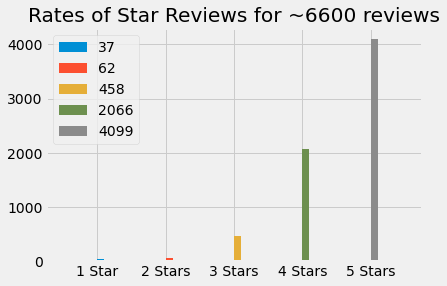

In [8]:
'''Plotting historgrma of star-rates'''

total_reviews = df['ratings'].count()

fig, ax = plt.subplots()
ax.hist(df[df['ratings'] == '1 Star']['ratings'], label=df[df['ratings'] == '1 Star']['ratings'].count())
ax.hist(df[df['ratings'] == '2 Stars']['ratings'], label=df[df['ratings'] == '2 Stars']['ratings'].count())
ax.hist(df[df['ratings'] == '3 Stars']['ratings'], label=df[df['ratings'] == '3 Stars']['ratings'].count())
ax.hist(df[df['ratings'] == '4 Stars']['ratings'], label=df[df['ratings'] == '4 Stars']['ratings'].count())
ax.hist(df[df['ratings'] == '5 Stars']['ratings'], label=df[df['ratings'] == '5 Stars']['ratings'].count())
ax.set_title(f'Rates of Star Reviews for ~{round(total_reviews-300,-2)} reviews')
_ = ax.legend()

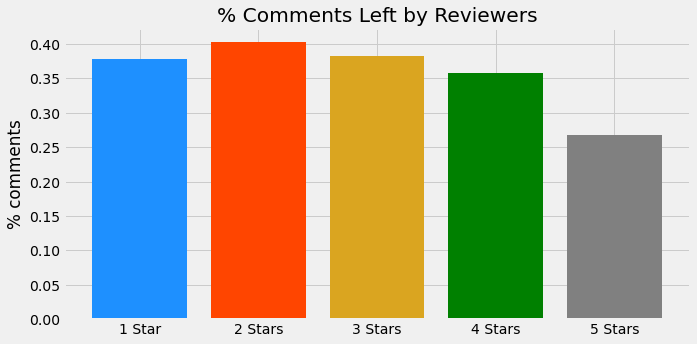

In [9]:
'''Plotting percent of reviews left per star rating'''

# calculating percent of reviews left per star rating
one = df[df['ratings'] == '1 Star']['review_text'].count() / df[df['ratings'] == '1 Star']['ratings'].count()
two = df[df['ratings'] == '2 Stars']['review_text'].count() / df[df['ratings'] == '2 Stars']['ratings'].count()
three = df[df['ratings'] == '3 Stars']['review_text'].count() / df[df['ratings'] == '3 Stars']['ratings'].count()
four = df[df['ratings'] == '4 Stars']['review_text'].count() / df[df['ratings'] == '4 Stars']['ratings'].count()
five = df[df['ratings'] == '5 Stars']['review_text'].count() / df[df['ratings'] == '5 Stars']['ratings'].count()

# gathering data for bar plot
df[df['ratings'] == '1 Star']['review_text'].count(), df[df['ratings'] == '1 Star']['ratings'].count()
df_ = pd.DataFrame(
    {'stars': ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars'], '% comments': [one, two, three, four, five]})

# plotting bar plot
x = np.arange(1,6)
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, df_['% comments'], color=('dodgerblue', 'orangered', 'goldenrod', 'green', 'grey'))
ax.set_xticks(x)
ax.set_xticklabels(df_['stars'])
ax.set_ylabel('% comments')
_ = ax.set_title(f'% Comments Left by Reviewers')
# _ = ax.legend()

## Comparing 4 and 5 stars reviews

In [10]:
five_star_reviews = df[df['ratings'] == '5 Stars']['review_text'].count() # num of written reviews left by five-star reviewers
four_star_reviews = df[df['ratings'] == '4 Stars']['review_text'].count() # num of written reviews left by four-star reviewers
five_star_ratings = df[df['ratings']=='5 Stars']['ratings'].count() # num of five-star reviewers
four_star_ratings = df[df['ratings']=='4 Stars']['ratings'].count() # num of four-star reviewers

table = pd.DataFrame({'Written Reviews': [four_star_reviews, five_star_reviews], 'Total Reviewers': [four_star_ratings, five_star_ratings]}, index = ['4 Stars', '5 Stars']).T
table = table.style.set_properties(**{'text-align': 'center'})
table

,4 Stars,5 Stars
Written Reviews,739,1096
Total Reviewers,2066,4099


In [11]:
0.05 / 3

0.016666666666666666

### Frequentist Approach

1. Question: Do 4 star and 5 star reviewers leave comments at different rates?

2. H0: Mu4 = Mu5 (4 and 5 star reviewers are equally likely to leave written reviews — P(R | 4) = P(R | 5))

3. Ha: Mu4 != Mu5 (4 and 5 star reviewers leave written reviews at different rates — P(R | 4) != P(R | 5))

4. Test Statistic: 4-Stars: 206 reviews and 5-Stars: 361 reviewers

5. Distribution: Normal

6. Alpha: 0.05 --> Bonferroni Correction: 0.05 / 3 = 0.017

7. Data:

    4 Stars 47/206
    
    5 Stars 75/361

In [12]:
four_stars_distribution = ([0] * (four_star_ratings - four_star_reviews)) + ([1] * four_star_reviews)
five_stars_distribution = (([0] * (five_star_ratings - five_star_reviews)) + ([1] * five_star_reviews))

print(f'Mean: \n   4 Stars {round(np.mean(four_stars_distribution),3)} \n   5 Stars {round(np.mean(five_stars_distribution),3)}\n')
print(f'Standard Deviation: \n   4 Stars {round(np.std(four_stars_distribution),3)} \n   5 Stars {round(np.std(five_stars_distribution),3)}')

Mean: 
   4 Stars 0.358 
   5 Stars 0.267

Standard Deviation: 
   4 Stars 0.479 
   5 Stars 0.443


In [13]:
# calculate welch test statistic (function in scipt.py)
test_statistic = functions_.welch_test_statistic(four_stars_distribution, five_stars_distribution)
test_statistic

7.16246989073056

In [14]:
# calculate degrees of freedom
dof = functions_.welch_satterhwaithe_df(four_stars_distribution, five_stars_distribution)

# set up distribution
students = scs.t(dof)

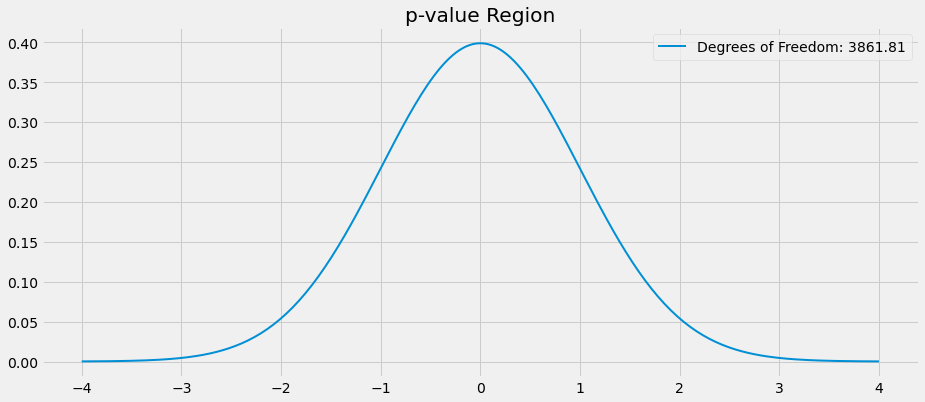

In [15]:
# Plotting distribution of Welch's Test Statistic Assuming H0

x = np.linspace(-4, 4, num=250)
fig, ax = plt.subplots(1, figsize=(14, 6))
students = scs.t(dof)
ax.plot(x, students.pdf(x), linewidth=2, label="Degrees of Freedom: {:2.2f}".format(dof))
_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region");

In [16]:
p_value_1 = students.cdf(-test_statistic) + (1 - students.cdf(test_statistic))
print("p-value for average written reviews: {:2.2f}".format(p_value_1))

p-value for average written reviews: 0.00


8. p-value: 0.00

9. Results: Reject H0.

10. In conclusion, the data show there is a difference in the rates of comments left by 4-star reviewers and 5-star reviewers.

### What about 3 v. 4 stars?

In [17]:
three_star_reviews = df[df['ratings'] == '3 Stars']['review_text'].count() # num of written reviews left by five-star reviewers
three_star_ratings = df[df['ratings']=='3 Stars']['ratings'].count() # num of five-star reviewers

table = pd.DataFrame({'Written Reviews': [three_star_reviews, four_star_reviews], 'Total Reviewers': [three_star_ratings, four_star_ratings]}, index = ['3 Stars', '4 Stars']).T
table = table.style.set_properties(**{'text-align': 'center'})
table

,3 Stars,4 Stars
Written Reviews,175,739
Total Reviewers,458,2066


In [18]:
three_stars_distribution = (([0] * (three_star_ratings - three_star_reviews)) + ([1] * three_star_reviews))

print(f'Mean: \n   3 Stars {round(np.mean(three_stars_distribution),3)} \n   4 Stars {round(np.mean(four_stars_distribution),3)}\n')
print(f'Standard Deviation: \n   3 Stars {round(np.std(three_stars_distribution),3)} \n   4 Stars {round(np.std(four_stars_distribution),3)}')

Mean: 
   3 Stars 0.382 
   4 Stars 0.358

Standard Deviation: 
   3 Stars 0.486 
   4 Stars 0.479


In [19]:
# calculate welch test statistic (function in scipt.py)
test_statistic2 = functions_.welch_test_statistic(three_stars_distribution, four_stars_distribution)
test_statistic2

0.9746735598879341

In [20]:
# calculate degrees of freedom
dof2 = functions_.welch_satterhwaithe_df(three_stars_distribution, four_stars_distribution)

# set up distribution
students = scs.t(dof2)

In [21]:
p_value_2 = students.cdf(-test_statistic2) + (1 - students.cdf(test_statistic2))
print("p-value for average written reviews: {:2.2f}".format(p_value_2))

p-value for average written reviews: 0.33


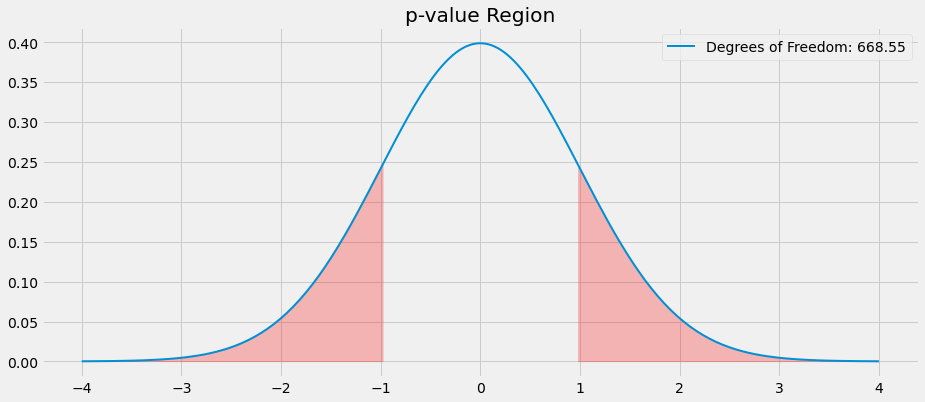

In [22]:
# Plotting distribution of Welch's Test Statistic Assuming H0

x = np.linspace(-4, 4, num=250)
fig, ax = plt.subplots(1, figsize=(14, 6))
students = scs.t(dof2)
ax.plot(x, students.pdf(x), linewidth=2, label="Degrees of Freedom: {:2.2f}".format(dof2))
_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic2), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic2), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region");

### Conclusion: There is insufficient evidence to reject H0, thus it cannot be said for certain that the rates of comments left by 3 and 4 star reviewers differ. The high p-value suggests that it is likely to see these results given the null hypothesis is true, that the means are equal and we would still see these results where the means actually have a difference of 0.382 - 0.358 = 0.024.

### And finally, 3 v. 5 stars

In [23]:
table = pd.DataFrame({'Written Reviews': [three_star_reviews, five_star_reviews], 'Total Reviewers': [three_star_ratings, five_star_ratings]}, index = ['3 Stars', '5 Stars']).T
table = table.style.set_properties(**{'text-align': 'center'})
table

,3 Stars,5 Stars
Written Reviews,175,1096
Total Reviewers,458,4099


In [24]:
print(f'Mean: \n   3 Stars {round(np.mean(three_stars_distribution),3)} \n   5 Stars {round(np.mean(five_stars_distribution),3)}\n')
print(f'Standard Deviation: \n   3 Stars {round(np.std(three_stars_distribution),3)} \n   5 Stars {round(np.std(five_stars_distribution),3)}')

Mean: 
   3 Stars 0.382 
   5 Stars 0.267

Standard Deviation: 
   3 Stars 0.486 
   5 Stars 0.443


In [25]:
# calculate welch test statistic (function in scipt.py)
test_statistic3 = functions_.welch_test_statistic(three_stars_distribution, five_stars_distribution)
test_statistic3

4.833370276264485

In [26]:
# calculate degrees of freedom
dof3 = functions_.welch_satterhwaithe_df(three_stars_distribution, five_stars_distribution)

# set up distribution
students = scs.t(dof3)

In [27]:
p_value_3 = students.cdf(-test_statistic3) + (1 - students.cdf(test_statistic3))
print("p-value for average written reviews: {:2.2f}".format(p_value_3))

p-value for average written reviews: 0.00


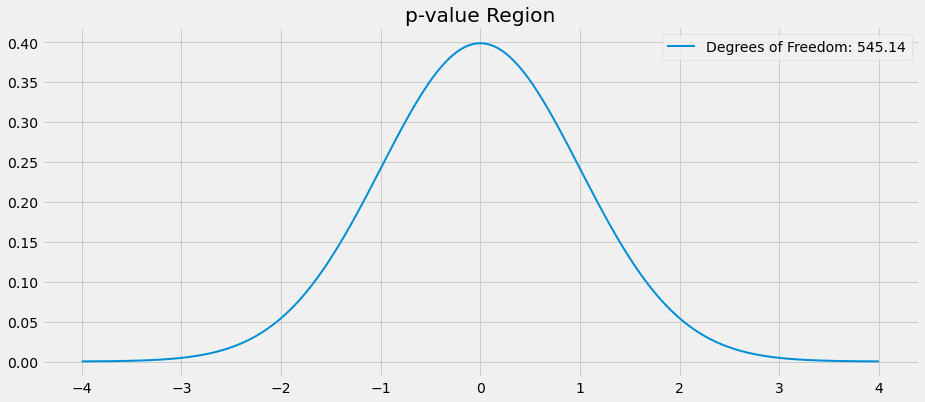

In [28]:
# Plotting distribution of Welch's Test Statistic Assuming H0

x = np.linspace(-4, 4, num=250)
fig, ax = plt.subplots(1, figsize=(14, 6))
students = scs.t(dof3)
ax.plot(x, students.pdf(x), linewidth=2, label="Degrees of Freedom: {:2.2f}".format(dof3))
_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic3), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic3), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region");

### Conclusion: There is sufficient evidence to reject H0, suggesting that the rates of comments left by 3 and 4 star reviewers do differ.

In [29]:
df.head()

,ratings,dates,types,review_text
0,4.5 Stars,"February 20, 2021",Backpacking,Completed on 2/19. Went up counterclockwise . ...
1,5 Stars,"February 15, 2021",Hiking,Really nice hike. We went counterclockwise and...
2,5 Stars,"February 13, 2021",Icy,Trail well packed through deep snow. Slippery...
3,5 Stars,"February 12, 2021",Snow,Completed on 2/12. Trail is broken but steep a...
4,4 Stars,"February 12, 2021",Hiking,"Lots of snow and ice, but no problem, and lots..."


In [32]:
'''Other relevant mongo commands'''
client.list_database_names()
client.drop_database()
db.collection.drop()

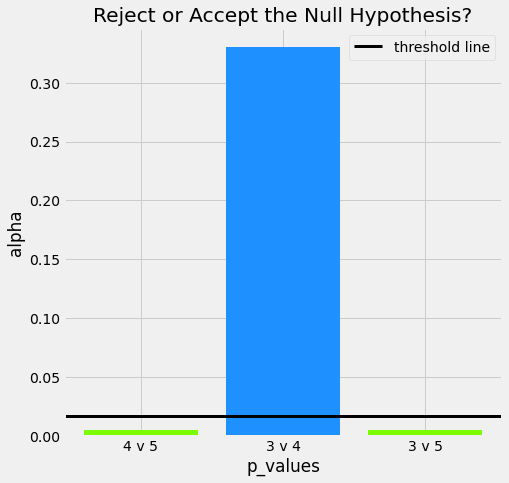

In [31]:
# plotting bar plot
fig, ax = plt.subplots(figsize=(7,7))
ax.bar([1,2,3], [.005, p_value_2, .005], color=('lawngreen', 'dodgerblue', 'lawngreen'))
ax.set_xticks([1,2,3])
ax.set_xticklabels(['4 v 5', '3 v 4', '3 v 5'])
# ax.set_ylabel('% comments')
ax.set_title(f'Reject or Accept the Null Hypothesis?')
ax.set_xlabel('p_values')
ax.set_ylabel('alpha')
plt.axhline(y=.017,linewidth=3, color='black', label='threshold line')
_ = ax.legend()


